In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import keras
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import random
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

Using TensorFlow backend.


In [2]:
print(os.getcwd())

D:\data


In [3]:
#D:\Cat_Vs_Dog
#D:\Vehicle
#['Cat','Dog']
#['Bus','CNG','Leguna','Pickup','Rickshaw','Thelagari','Van']
directory=r'D:\dataset'#read main dataset
category=['Bus','CNG','Leguna','Pickup','Rickshaw','Thelagari','Van'] # classes of dataset 1 step

In [84]:
img_size=224 # step 2
dataset=[]
for ctg in category: # ready for dataset training and Testing 
    folder=os.path.join(directory, ctg)
    classes=category.index(ctg)
    for img in os.listdir(folder):
        try:
            img_array=cv2.imread(os.path.join(folder,img))
            new_array=cv2.resize(img_array, (img_size,img_size))
            dataset.append([new_array,classes])
        except Exception as e:
            pass
        #img_path=os.path.join(folder, img)
        #img_array=cv2.imread(img_path)
        #img_array=cv2.resize(img_array, (img_size,img_size))
        #dataset.append([img_array,ctg])
        #dataset.append([img_array,classes])

In [85]:
len(dataset)

1304

In [86]:
random.shuffle(dataset) # step 3

In [87]:
dataset[0]

[array([[[171, 216, 254],
         [172, 217, 251],
         [171, 215, 251],
         ...,
         [ 69,  59, 249],
         [ 78,  65, 255],
         [ 85,  76, 255]],
 
        [[169, 214, 252],
         [171, 216, 254],
         [170, 215, 253],
         ...,
         [125, 121, 255],
         [130, 126, 253],
         [139, 131, 255]],
 
        [[166, 213, 254],
         [166, 213, 253],
         [168, 215, 253],
         ...,
         [ 55,  54, 170],
         [ 44,  41, 160],
         [ 44,  42, 159]],
 
        ...,
 
        [[ 94, 111, 137],
         [ 26,  30,  71],
         [ 23,  33,  90],
         ...,
         [ 43,  47, 151],
         [ 54,  78, 184],
         [  3, 191, 231]],
 
        [[104, 120, 143],
         [ 80, 102, 126],
         [ 23,  26,  65],
         ...,
         [ 96, 106, 202],
         [ 54,  63, 166],
         [ 24, 179, 214]],
 
        [[101, 116, 135],
         [ 95, 113, 136],
         [ 91, 110, 137],
         ...,
         [ 40,  46, 175],
  

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


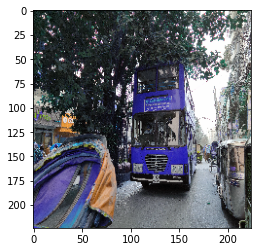

In [88]:
for img in dataset[:2]:
    print(plt.imshow(img[0]))

In [89]:
X=[] # step 4
Y=[]
for features,label in dataset:
    X.append(features)
    Y.append(label)
    

In [90]:
len(X)

1304

In [91]:
Y[2]

3

In [92]:
X=np.array(X) # step 5
Y=np.array(Y)

In [93]:
from sklearn.model_selection import train_test_split # step 6
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state =5)

In [94]:
x_train.shape

(1043, 224, 224, 3)

In [95]:
y_train[:5]

array([5, 1, 2, 5, 6])

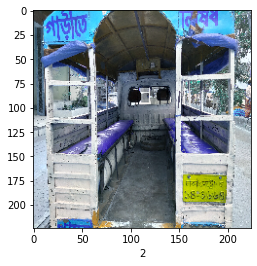

In [96]:
def plt_sample(x,y,index): # see a pic
    plt.imshow(x[index])
    plt.xlabel(y[index])
plt_sample(x_train,y_train,2)

In [97]:
x_train.astype('float32')
x_test.astype('float32')

array([[[[211., 215., 203.],
         [104., 133., 118.],
         [ 80., 125., 122.],
         ...,
         [ 11.,  82.,  86.],
         [ 13.,  56.,  74.],
         [ 21.,  57.,  74.]],

        [[243., 239., 221.],
         [104., 130., 111.],
         [ 61.,  96.,  92.],
         ...,
         [  7.,  68.,  90.],
         [ 76., 107., 162.],
         [111., 143., 192.]],

        [[254., 254., 239.],
         [ 95., 118.,  90.],
         [ 29.,  57.,  52.],
         ...,
         [ 93., 123., 165.],
         [ 55.,  92., 149.],
         [103., 137., 190.]],

        ...,

        [[110., 130., 171.],
         [125., 154., 196.],
         [103., 124., 186.],
         ...,
         [  6.,  23.,  35.],
         [  1.,  21.,  26.],
         [ 34.,  71.,  66.]],

        [[ 99., 118., 186.],
         [108., 126., 191.],
         [120., 145., 188.],
         ...,
         [ 11.,  22.,  26.],
         [  3.,   9.,  12.],
         [  2.,  16.,  15.]],

        [[ 97., 116., 183.],
       

In [98]:
x_train = x_train/255.0 # step 7
x_test= x_test/255.0

In [158]:
model = models.Sequential() # model 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.8))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7,activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=80, 
                    validation_data=(x_test, y_test))
model.save('models/32_64_CNN.h5')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 128)      

33/33 [==============================] - 38s 1s/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.1782 - val_accuracy: 0.9502
Epoch 46/80
33/33 [==============================] - 40s 1s/step - loss: 0.0437 - accuracy: 0.9827 - val_loss: 0.1586 - val_accuracy: 0.9464
Epoch 47/80
33/33 [==============================] - 40s 1s/step - loss: 0.0430 - accuracy: 0.9875 - val_loss: 0.1633 - val_accuracy: 0.9579
Epoch 48/80
33/33 [==============================] - 40s 1s/step - loss: 0.1024 - accuracy: 0.9636 - val_loss: 0.2504 - val_accuracy: 0.9387
Epoch 49/80
33/33 [==============================] - 42s 1s/step - loss: 0.0432 - accuracy: 0.9847 - val_loss: 0.2001 - val_accuracy: 0.9502
Epoch 50/80
33/33 [==============================] - 39s 1s/step - loss: 0.0342 - accuracy: 0.9904 - val_loss: 0.2025 - val_accuracy: 0.9464
Epoch 51/80
33/33 [==============================] - 38s 1s/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.1956 - val_accuracy: 0.9540
Epoch 52/80
33/33 [======

In [159]:
model.evaluate(x_test,y_test) 

9/9 [==============================] - 2s 227ms/step - loss: 0.2001 - accuracy: 0.9617


[0.20013374090194702, 0.961685836315155]

In [160]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
y_pred=model.predict(x_test)
y_pred_class=[np.argmax(element) for element in y_pred]
cm=confusion_matrix(y_test,y_pred_class)
print("confusion matrix: \n",cm)
print("Classification Report: \n",classification_report(y_test,y_pred_class))

confusion matrix: 
 [[40  0  0  0  0  1  1]
 [ 0 28  0  0  1  0  2]
 [ 0  0 36  0  0  0  0]
 [ 0  0  0 40  0  0  0]
 [ 1  0  0  0 55  0  1]
 [ 0  0  0  0  0 26  0]
 [ 0  0  0  1  0  2 26]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       1.00      0.90      0.95        31
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        40
           4       0.98      0.96      0.97        57
           5       0.90      1.00      0.95        26
           6       0.87      0.90      0.88        29

    accuracy                           0.96       261
   macro avg       0.96      0.96      0.96       261
weighted avg       0.96      0.96      0.96       261



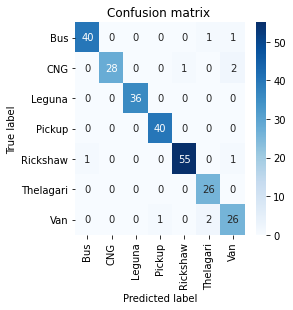

In [161]:
cm = pd.DataFrame(cm,index = category, 
                     columns = category)

figure = plt.figure(figsize=(4, 4))
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion matrix ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("D:\Vehicle\img222.png")
plt.show()

9/9 [==============================] - 2s 226ms/step - loss: 0.2001 - accuracy: 0.9617


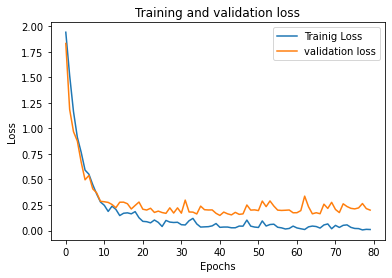

In [162]:
model.evaluate(x_test,y_test,batch_size=32, verbose=1)
plt.plot(history.history['loss'],label='Trainig Loss')
plt.plot(history.history['val_loss'],label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("D:\Vehicle\img1.png")
plt.show()

9/9 [==============================] - 2s 224ms/step - loss: 0.2001 - accuracy: 0.9617


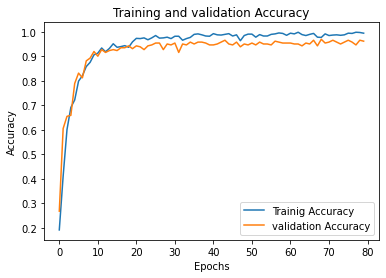

In [163]:
model.evaluate(x_test,y_test,batch_size=32, verbose=1)
plt.plot(history.history['accuracy'],label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'],label="validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("D:\Vehicle\img2.png")
plt.show()

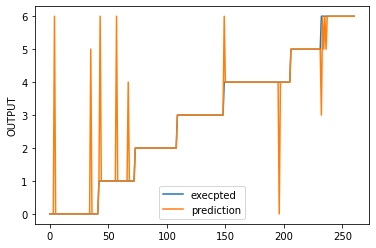

In [164]:
def chart_regression(pred,y,sort=True):
    t=pd.DataFrame({'pred':pred,'y':y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    plt.plot(t['y'].tolist(),label='execpted')
    plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('OUTPUT')
    plt.legend()
    plt.savefig("cnn.png")
    plt.show()
y_test1 = np.array(list(y_test))
y_pred1 = np.array(y_pred_class)
chart_regression(y_pred1.flatten(),y_test1)

In [2]:
# ann = models.Sequential([layers.Flatten(input_shape=(img_size,img_size,3)), 
#                         layers.Dense(3000, activation='relu'),
#                          layers.Dense(1000, activation='relu'),
#                         layers.Dense(7, activation='sigmoid')
#                        ])
# ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# ann.fit(x_train,y_train,epochs=5)

In [3]:
#ann.evaluate(x_test,y_test)

In [4]:
#from sklearn.metrics import classification_report,confusion_matrix
#y_pred=ann.predict(x_test)
#y_pred_class=[np.argmax(element) for element in y_pred]
#print("Classification Report: \n",classification_report(y_test,y_pred_class))

In [11]:
#strides=(1,1), padding='same' ,
# cnn = models.Sequential([
#                         layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu", input_shape=(img_size,img_size,3)),
#                         layers.MaxPooling2D((2,2)),
#                         layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
#                         layers.MaxPooling2D((2,2)),
#                         layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
#                         layers.MaxPooling2D((2,2)),
#                         #layers.Dropout(0.25),
#                         #layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
#                         #layers.MaxPooling2D((2,2)),
#                         #layers.Dropout(0.25),
                            
#                         layers.Flatten(),
#                         layers.Dense(64, activation='relu'),
#                         layers.Dropout(0.4),
#                         layers.Dense(32, activation='relu'),
#                         layers.Dropout(0.3),
#                         layers.Dense(7, activation='softmax')
#                         ])
# cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# history=cnn.fit(x_train,y_train,epochs=20,batch_size=32,validation_split = 0.1)

In [10]:
# cnn.evaluate(x_test,y_test)

In [9]:
# from sklearn.metrics import classification_report,confusion_matrix
# y_pred=cnn.predict(x_test)
# y_pred_class=[np.argmax(element) for element in y_pred]
# print("Classification Report: \n",classification_report(y_test,y_pred_class))

In [8]:
# cnn.evaluate(x_test,y_test,batch_size=32, verbose=1)
# plt.plot(history.history['loss'],label='Trainig Loss')
# plt.plot(history.history['val_loss'],label="validation loss")
# plt.title("Training and validation loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend()
# plt.show()

In [7]:
# cnn.evaluate(x_test,y_test,batch_size=32, verbose=1)
# plt.plot(history.history['accuracy'],label='Trainig Accuracy')
# plt.plot(history.history['val_accuracy'],label="validation Accuracy")
# plt.title("Training and validation Accuracy")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()